<a href="https://colab.research.google.com/github/florcisco/Sesgos-Cognitivos/blob/main/SC_Exploracion_y_Curacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctico 2: Análisis Exploratorio y Curación de Datos

## Mentoría *Sesgos Cognitivos en Razonamientos Lógicos*

**Fecha de entrega:** 17/07

Profundizaremos en lo trabajado anteriormente y prepararemos nuestros datos para aplicar algoritmos de aprendizaje automático en el próximo práctico.

- Pondremos nuestros datos en un único dataset.

- Trabajaremos en la imputación de valores faltantes, conversión de datos categóricos, etc.

- Una actividad destacada será la creación de una columna llamada "índice de creencia", que será nuestra variable a predecir en el siguiente práctico ☺

<br></br>


------------------------------------------------------------------------------------------------------------------------

## 1. Curación I

In [104]:
# importación de librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

plt.style.use('bmh')
color='#7795f8'

In [105]:
# carga de dataset
df1o = pd.read_csv('https://raw.githubusercontent.com/florcisco/Sesgos-Cognitivos/refs/heads/main/dataset1_raw.csv') # primer estudio
df2o = pd.read_csv('https://raw.githubusercontent.com/florcisco/Sesgos-Cognitivos/refs/heads/main/dataset2_raw.csv') # segundo estudio

### 1.1. Selección de columnas relevantes

Eliminen las columnas que no son relevantes para nuestro problema.

*Opcional*: conservar columnas `Edad` y/o `Género`

In [106]:
df1o.columns

Index(['num', 'Participante', 'Lugar_admin', 'Modalidad', 'Edad', 'Género',
       'Grupo', 'Validez', 'Creencia', 'ValidezxCreencia', 'Silogismo',
       'Aceptación', 'Correctas'],
      dtype='object')

In [107]:
df1=df1o.copy()
df1=df1.drop(['num', 'Lugar_admin', 'Edad', 'Género'], axis=1)
df1.head()

,Participante,Modalidad,Grupo,Validez,Creencia,ValidezxCreencia,Silogismo,Aceptación,Correctas
0,1,Resolución Individual,,V,C,VC,1,1,1
1,1,Resolución Individual,,V,I,VI,2,1,1
2,1,Resolución Individual,,I,C,IC,3,0,1
3,1,Resolución Individual,,I,I,II,4,0,1
4,1,Resolución Individual,,V,C,VC,5,1,1


In [108]:
df2=df2o.copy()
df2=df2.drop(['num', 'Lugar_admin', 'Edad', 'Género'], axis=1)
df2.head()

,Participante,Modalidad,Grupo,Validez,Creencia,ValidezxCreencia,Silogismo,Aceptación,Correctas
0,240,Resolución Individual Pre,27,V,C,VC,1,1,1
1,240,Resolución Individual Pre,27,V,I,VI,2,0,0
2,240,Resolución Individual Pre,27,I,C,IC,3,0,1
3,240,Resolución Individual Pre,27,I,I,II,4,0,1
4,240,Resolución Individual Pre,27,V,C,VC,5,1,1


### 1.2. Imputación de valores

**(a)** En el práctico anterior, observamos que en nuestro segundo conjunto de datos había participantes que no tenían cargadas las 8 filas correspondientes a la resolución grupal. Sin embargo, esos datos pueden ser inferidos utilizando para ello la columna `Grupo`.

Completen los registros faltantes correspondientes a la `Resolución Grupal` en el segundo conjunto de datos de modo que contemos con 24 filas para cada participante.

<font color='#99b0fa'> Recordando del trabajo anterior, se sabe que en el segundo conjunto se tiene 24 grupos y 115 participantes. Entonces se busca que los 115 participantes tengan las 24 respuestas como el siguiente participante.
Se decidió separar las 8 respuestas grupales de los 24 grupos de las 16 respuestas individuales de los 115 participantes para luego intercalar las respuestas grupales correspondientes a cada participante.

In [109]:
resp_grup = df2.copy()
resp_grup = resp_grup[resp_grup["Modalidad"] == 'Resolución Grupal' ]# En esta tabla se tienen únicamente los participantes que tienen las 8 respuestas grupales,
print("Participantes con las respuestas grupales:", resp_grup.Participante.unique(), resp_grup.Participante.nunique())
print("Grupos:", resp_grup.Grupo.unique(), resp_grup.Grupo.nunique())
resp_grup.groupby(["Grupo", "Participante"]).count().describe() # se corrobora que efectivamente se tiene un participante por grupo y las 8 respuestas correspondientes

Participantes con las respuestas grupales: [244 249 254 259 264 269 274 279 283 288 293 298 303 308 313 318 322 327
 332 337 342 346 350 354] 24
Grupos: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50] 24


,Modalidad,Validez,Creencia,ValidezxCreencia,Silogismo,Aceptación,Correctas
count,24.0,24.0,24.0,24.0,24.0,24.0,24.0
mean,8.0,8.0,8.0,8.0,8.0,8.0,8.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,8.0,8.0,8.0,8.0,8.0,8.0,8.0
25%,8.0,8.0,8.0,8.0,8.0,8.0,8.0
50%,8.0,8.0,8.0,8.0,8.0,8.0,8.0
75%,8.0,8.0,8.0,8.0,8.0,8.0,8.0
max,8.0,8.0,8.0,8.0,8.0,8.0,8.0


In [110]:
resp_grup.drop("Participante", axis=1, inplace=True)# se elimina la columna participante para poder usar el bloque grupal para cualquier participante
resp_grup.reset_index(drop=True, inplace=True) # se resetea los indices y se tiene la tabla final de respuestas grupales
resp_grup

,Modalidad,Grupo,Validez,Creencia,ValidezxCreencia,Silogismo,Aceptación,Correctas
0,Resolución Grupal,27,V,C,VC,1,1,1
1,Resolución Grupal,27,V,I,VI,2,1,1
2,Resolución Grupal,27,I,C,IC,3,0,1
3,Resolución Grupal,27,I,I,II,4,0,1
4,Resolución Grupal,27,V,C,VC,5,1,1
...,...,...,...,...,...,...,...,...
187,Resolución Grupal,50,I,I,II,4,0,1
188,Resolución Grupal,50,V,C,VC,5,1,1
189,Resolución Grupal,50,V,I,VI,6,1,1
190,Resolución Grupal,50,I,C,IC,7,1,0


In [111]:
df_pop2 = df2.copy()
df_pop2 = df_pop2[df_pop2["Modalidad"] != 'Resolución Grupal' ]
print(len(df_pop2), df_pop2.Participante.nunique())
print(len(df_pop2)/df_pop2.Participante.nunique())# Esta tabla tiene unicamente las 16 respuestas individuales de los 115 participantes
df_pop2.groupby(["Participante"]).count().describe()# confirmamos que efectivamente sea así

1840 115
16.0


,Modalidad,Grupo,Validez,Creencia,ValidezxCreencia,Silogismo,Aceptación,Correctas
count,115.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0
mean,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0
25%,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0
50%,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0
75%,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0
max,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0


In [112]:
df_2=df_pop2.set_index(["Participante"]).sort_index() # Se convierte el identificador de participante como indice de la tabla para poder iterar sobre estos
df_2

,Modalidad,Grupo,Validez,Creencia,ValidezxCreencia,Silogismo,Aceptación,Correctas
Participante,,,,,,,,
240,Resolución Individual Pre,27,V,C,VC,1,1,1
240,Resolución Individual Pre,27,V,I,VI,2,0,0
240,Resolución Individual Pre,27,I,C,IC,3,0,1
240,Resolución Individual Pre,27,I,I,II,4,0,1
240,Resolución Individual Pre,27,V,C,VC,5,1,1
...,...,...,...,...,...,...,...,...
354,Resolución Individual Post,50,I,I,II,4,0,1
354,Resolución Individual Post,50,V,C,VC,5,1,1
354,Resolución Individual Post,50,V,I,VI,6,1,1


In [113]:
df_2.groupby(["Grupo"]).count()/16 #solo queda corroborar cuantos participantes tiene cada grupo, se puede predecir que no son todos los grupos iguales porque 115 no es divisible por 24

,Modalidad,Validez,Creencia,ValidezxCreencia,Silogismo,Aceptación,Correctas
Grupo,,,,,,,
27,5.0,5.0,5.0,5.0,5.0,5.0,5.0
28,5.0,5.0,5.0,5.0,5.0,5.0,5.0
29,5.0,5.0,5.0,5.0,5.0,5.0,5.0
30,5.0,5.0,5.0,5.0,5.0,5.0,5.0
31,5.0,5.0,5.0,5.0,5.0,5.0,5.0
32,5.0,5.0,5.0,5.0,5.0,5.0,5.0
33,5.0,5.0,5.0,5.0,5.0,5.0,5.0
34,5.0,5.0,5.0,5.0,5.0,5.0,5.0
35,4.0,4.0,4.0,4.0,4.0,4.0,4.0


<font color='#99b0fa'> Entonces la estrategia es concatenar en orden las respuestas grupales con los participantes, repitiendo la cantidad de participantes que tenga cada grupo, como se ve en la tabla anterior todos los grupos tienen 5 participantes menos el 35, 43, 48, 49 y 50

In [114]:
pd.concat([df_2.loc[240],resp_grup[resp_grup["Grupo"]==27]], axis=0)# Esto es lo que se busca obtener para los 115 articipantes

,Modalidad,Grupo,Validez,Creencia,ValidezxCreencia,Silogismo,Aceptación,Correctas
240,Resolución Individual Pre,27,V,C,VC,1,1,1
240,Resolución Individual Pre,27,V,I,VI,2,0,0
240,Resolución Individual Pre,27,I,C,IC,3,0,1
240,Resolución Individual Pre,27,I,I,II,4,0,1
240,Resolución Individual Pre,27,V,C,VC,5,1,1
240,Resolución Individual Pre,27,V,I,VI,6,0,0
240,Resolución Individual Pre,27,I,C,IC,7,1,0
240,Resolución Individual Pre,27,I,I,II,8,0,1
240,Resolución Individual Post,27,V,C,VC,1,1,1
240,Resolución Individual Post,27,V,I,VI,2,1,1


In [115]:
df2f = pd.DataFrame(columns=["Modalidad", "Grupo", "Validez", "Creencia", "ValidezxCreencia", "Silogismo", "Aceptación", "Correctas"])# tabla vacía
cuatro=[50,48,43,35,49] # Grupos que tienen 4 participantes y no 5
grupos=df_pop2["Grupo"].unique() # identificadores de los grupos
part=df_pop2.Participante.unique() # identificadores de los participantes

for g in grupos:
  if part.size == 0:
    break #sale del loop si ya no quedan participantes
  if g in cuatro: # si el grupo es de cuatro participantes hace cuatro concatenaciones
    for j in range(4):
      aux=pd.concat([df_2.loc[part[0]],resp_grup[resp_grup["Grupo"]==g]], axis=0)
      df2f=pd.concat([df2f,aux],axis=0)
      part=np.delete(part, 0)
      if part.size == 0:
        break #sale del loop si ya no quedan participantes
  else:
    for i in range(5): # si el grupo es de cinco participantes hace cinco concatenaciones
      if part.size == 0:
          break #sale del loop si ya no quedan participantes
      aux=pd.concat([df_2.loc[part[0]],resp_grup[resp_grup["Grupo"]==g]], axis=0)
      df2f=pd.concat([df2f,aux],axis=0)
      part=np.delete(part, 0)

In [116]:
df2f.groupby(["Grupo"]).count()/24 # corroborando que todos los grupos tengan 24*cantidad de participantes respuestas --> todos los participantes tienen 24 respuestas

,Modalidad,Validez,Creencia,ValidezxCreencia,Silogismo,Aceptación,Correctas
Grupo,,,,,,,
27,5.0,5.0,5.0,5.0,5.0,5.0,5.0
28,5.0,5.0,5.0,5.0,5.0,5.0,5.0
29,5.0,5.0,5.0,5.0,5.0,5.0,5.0
30,5.0,5.0,5.0,5.0,5.0,5.0,5.0
31,5.0,5.0,5.0,5.0,5.0,5.0,5.0
32,5.0,5.0,5.0,5.0,5.0,5.0,5.0
33,5.0,5.0,5.0,5.0,5.0,5.0,5.0
34,5.0,5.0,5.0,5.0,5.0,5.0,5.0
35,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [117]:
p=np.arange(240, 355, 1) #Recuparar los identificadores de los participantes
df2f["Participante"]= np.repeat(p, 24)
df2f.reset_index(drop=True, inplace=True)
df2f= df2f.reindex(columns=df1.columns) # poner en el orden correcto las columnas
df2f #tabla terminada

,Participante,Modalidad,Grupo,Validez,Creencia,ValidezxCreencia,Silogismo,Aceptación,Correctas
0,240,Resolución Individual Pre,27,V,C,VC,1,1,1
1,240,Resolución Individual Pre,27,V,I,VI,2,0,0
2,240,Resolución Individual Pre,27,I,C,IC,3,0,1
3,240,Resolución Individual Pre,27,I,I,II,4,0,1
4,240,Resolución Individual Pre,27,V,C,VC,5,1,1
...,...,...,...,...,...,...,...,...,...
2755,354,Resolución Grupal,50,I,I,II,4,0,1
2756,354,Resolución Grupal,50,V,C,VC,5,1,1
2757,354,Resolución Grupal,50,V,I,VI,6,1,1
2758,354,Resolución Grupal,50,I,C,IC,7,1,0


**(b)** (Opcional) Si se conservaron las columnas `Edad` y/o `Género`, realicen la imputación de los valores faltantes en ambos conjuntos de datos. Tengan en cuenta los valores que pueden ser inferidos (cuando sí poseemos los datos de participantes) y aquellos que efectivamente son faltantes (no hay datos cargados en ninguna fila). Para el último caso, indiquen la técnica que utilizaron.

**(c)** (Opcional) Como ya observaron en el segundo práctico, en nuestro primer dataset los valores de la columna `grupo` son del tipo *object*, mas puntualmente, tipo *string*. Para el caso de participantes que realizaron la resolución individual este campo contiene un espacio vacío.

Reemplacen este valor por el string `0` y luego convierta a valores numéricos.

In [118]:
df1[df1["Grupo"]==" "] # estas son las columnas a modificar

,Participante,Modalidad,Grupo,Validez,Creencia,ValidezxCreencia,Silogismo,Aceptación,Correctas
0,1,Resolución Individual,,V,C,VC,1,1,1
1,1,Resolución Individual,,V,I,VI,2,1,1
2,1,Resolución Individual,,I,C,IC,3,0,1
3,1,Resolución Individual,,I,I,II,4,0,1
4,1,Resolución Individual,,V,C,VC,5,1,1
...,...,...,...,...,...,...,...,...,...
947,119,Resolución Individual,,I,I,II,4,0,1
948,119,Resolución Individual,,V,C,VC,5,1,1
949,119,Resolución Individual,,V,I,VI,6,0,0
950,119,Resolución Individual,,I,C,IC,7,0,1


In [119]:
df_1=df1.copy()
df_1.loc[(df_1.Grupo == " "), 'Grupo'] = "0" # reemplazando por el string 0
df_1.groupby(["Grupo", "Participante"]).describe() # verificando

Silogismo                                           \
                       count mean      std  min   25%  50%   75%  max   
Grupo Participante                                                      
0     1                  8.0  4.5  2.44949  1.0  2.75  4.5  6.25  8.0   
      2                  8.0  4.5  2.44949  1.0  2.75  4.5  6.25  8.0   
      3                  8.0  4.5  2.44949  1.0  2.75  4.5  6.25  8.0   
      4                  8.0  4.5  2.44949  1.0  2.75  4.5  6.25  8.0   
      5                  8.0  4.5  2.44949  1.0  2.75  4.5  6.25  8.0   
...                      ...  ...      ...  ...   ...  ...   ...  ...   
8     158                8.0  4.5  2.44949  1.0  2.75  4.5  6.25  8.0   
9     159                8.0  4.5  2.44949  1.0  2.75  4.5  6.25  8.0   
      160                8.0  4.5  2.44949  1.0  2.75  4.5  6.25  8.0   
      161                8.0  4.5  2.44949  1.0  2.75  4.5  6.25  8.0   
      162                8.0  4.5  2.44949  1.0  2.75  4.5  6.25  8.0   

                   Aceptación         ...            Correctas         \
                        count   mean  ...   75%  max     count   mean   
Grupo Participante                    ...                               
0     1                   8.0  0.625  ...  1.00  1.0       8.0  0.875   
      2                   8.0  0.750  ...  1.00  1.0       8.0  0.750   
      3                   8.0  0.250  ...  0.25  1.0       8.0  0.500   
      4                   8.0  0.625  ...  1.00  1.0       8.0  0.875   
      5                   8.0  0.500  ...  1.00  1.0       8.0  0.750   
...                       ...    ...  ...   ...  ...       ...    ...   
8     158                 8.0  0.500  ...  1.00  1.0       8.0  0.750   
9     159                 8.0  0.625  ...  1.00  1.0       8.0  0.625   
      160                 8.0  0.625  ...  1.00  1.0       8.0  0.625   
      161                 8.0  0.625  ...  1.00  1.0       8.0  0.625   
      162                 8.0  0.625  ...  1.00  1.0       8.0  0.625   

                                                        
                         std  min   25%  50%  75%  max  
Grupo Participante                                      
0     1             0.353553  0.0  1.00  1.0  1.0  1.0  
      2             0.462910  0.0  0.75  1.0  1.0  1.0  
      3             0.534522  0.0  0.00  0.5  1.0  1.0  
      4             0.353553  0.0  1.00  1.0  1.0  1.0  
      5             0.462910  0.0  0.75  1.0  1.0  1.0  
...                      ...  ...   ...  ...  ...  ...  
8     158           0.462910  0.0  0.75  1.0  1.0  1.0  
9     159           0.517549  0.0  0.00  1.0  1.0  1.0  
      160           0.517549  0.0  0.00  1.0  1.0  1.0  
      161           0.517549  0.0  0.00  1.0  1.0  1.0  
      162           0.517549  0.0  0.00  1.0  1.0  1.0  

[239 rows x 24 columns]

In [120]:
df_1['Grupo'] = df_1['Grupo'].astype('int')
df_1.info() # comprobando el tipo de dato del todas las columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1912 entries, 0 to 1911
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Participante      1912 non-null   int64 
 1   Modalidad         1912 non-null   object
 2   Grupo             1912 non-null   int64 
 3   Validez           1912 non-null   object
 4   Creencia          1912 non-null   object
 5   ValidezxCreencia  1912 non-null   object
 6   Silogismo         1912 non-null   int64 
 7   Aceptación        1912 non-null   int64 
 8   Correctas         1912 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 134.6+ KB


**(d)** Notemos con respecto a la columna `Modalidad` que el valor *Resolución Grupal* aparece en ambos conjuntos de datos. Sin embargo, en el segundo dataset la resolución grupal de la tarea tiene lugar después de una resolución individual, por lo cual convendría distinguirlas.

Modifiquen los datos en el segundo dataset asignando nuevos valores a las celdas donde encontramos el valor *Resolución Grupal*.

In [121]:
df2f

,Participante,Modalidad,Grupo,Validez,Creencia,ValidezxCreencia,Silogismo,Aceptación,Correctas
0,240,Resolución Individual Pre,27,V,C,VC,1,1,1
1,240,Resolución Individual Pre,27,V,I,VI,2,0,0
2,240,Resolución Individual Pre,27,I,C,IC,3,0,1
3,240,Resolución Individual Pre,27,I,I,II,4,0,1
4,240,Resolución Individual Pre,27,V,C,VC,5,1,1
...,...,...,...,...,...,...,...,...,...
2755,354,Resolución Grupal,50,I,I,II,4,0,1
2756,354,Resolución Grupal,50,V,C,VC,5,1,1
2757,354,Resolución Grupal,50,V,I,VI,6,1,1
2758,354,Resolución Grupal,50,I,C,IC,7,1,0


In [122]:
df_2=df2f.copy()
df_2.loc[(df_2.Modalidad == "Resolución Grupal"), 'Modalidad'] = 'Resolución Grupal_ws' # reemplazando el nombre del diseño within-subjects
df_2.groupby(["Modalidad", "Participante"]).describe() # verificando

Grupo                 Validez         \
                                       count unique top freq   count unique   
Modalidad                 Participante                                        
Resolución Grupal_ws      240              8      1  27    8       8      2   
                          241              8      1  27    8       8      2   
                          242              8      1  27    8       8      2   
                          243              8      1  27    8       8      2   
                          244              8      1  27    8       8      2   
...                                      ...    ...  ..  ...     ...    ...   
Resolución Individual Pre 350              8      1  49    8       8      2   
                          351              8      1  50    8       8      2   
                          352              8      1  50    8       8      2   
                          353              8      1  50    8       8      2   
                          354              8      1  50    8       8      2   

                                                Creencia         ...  \
                                       top freq    count unique  ...   
Modalidad                 Participante                           ...   
Resolución Grupal_ws      240            V    4        8      2  ...   
                          241            V    4        8      2  ...   
                          242            V    4        8      2  ...   
                          243            V    4        8      2  ...   
                          244            V    4        8      2  ...   
...                                     ..  ...      ...    ...  ...   
Resolución Individual Pre 350            V    4        8      2  ...   
                          351            V    4        8      2  ...   
                          352            V    4        8      2  ...   
                          353            V    4        8      2  ...   
                          354            V    4        8      2  ...   

                                       Silogismo      Aceptación             \
                                             top freq      count unique top   
Modalidad                 Participante                                        
Resolución Grupal_ws      240                  1    1          8      2   1   
                          241                  1    1          8      2   1   
                          242                  1    1          8      2   1   
                          243                  1    1          8      2   1   
                          244                  1    1          8      2   1   
...                                          ...  ...        ...    ...  ..   
Resolución Individual Pre 350                  1    1          8      2   1   
                          351                  1    1          8      2   1   
                          352                  1    1          8      2   1   
                          353                  1    1          8      2   1   
                          354                  1    1          8      2   1   

                                            Correctas                  
                                       freq     count unique top freq  
Modalidad                 Participante                                 
Resolución Grupal_ws      240             4         8      1   1    8  
                          241             4         8      1   1    8  
                          242             4         8      1   1    8  
                          243             4         8      1   1    8  
                          244             4         8      1   1    8  
...                                     ...       ...    ...  ..  ...  
Resolución Individual Pre 350             4         8      2   1    6  
                          351             6         8      2   1    6  
                        

In [123]:
df_2.info()# para terminar de acomodar los tipos de datos y tener correspondencia con el df_1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760 entries, 0 to 2759
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Participante      2760 non-null   int64 
 1   Modalidad         2760 non-null   object
 2   Grupo             2760 non-null   object
 3   Validez           2760 non-null   object
 4   Creencia          2760 non-null   object
 5   ValidezxCreencia  2760 non-null   object
 6   Silogismo         2760 non-null   object
 7   Aceptación        2760 non-null   object
 8   Correctas         2760 non-null   object
dtypes: int64(1), object(8)
memory usage: 194.2+ KB


In [124]:
df_2 = df_2.astype({'Grupo': 'int', 'Silogismo': 'int', 'Aceptación': 'int', 'Correctas': 'int'})
df_2.dtypes==df_1.dtypes # confirmando la correspondencia

,0
Participante,True
Modalidad,True
Grupo,True
Validez,True
Creencia,True
ValidezxCreencia,True
Silogismo,True
Aceptación,True
Correctas,True


### 1.3. Creación de columnas

Hasta el momento hemos completado ambos conjuntos de datos, de modo que contamos con toda la información relativa a la resolución de la tarea para cada participante.

Ahora bien, cada resolución consiste en la evaluación de 8 argumentos, para poder extraer información y -posteriormente- predecir la presencia de sesgos de creencia necesitamos que nuestros datos se encuentren en un formato más conveniente.

Con ese objetivo deberán crear nuevas columnas para cada argumento y sus propiedades.

Tomando el primer argumento, su validez, aceptación y corrección de la respuesta, (y si conservamos género y edad) las nuevas columnas tendrán un aspecto de este tipo:  

In [125]:
ds1 = {'Participante': [1, 2, 3, 4, 5],
        'Edad': [18, 23, 20, 25, 20],
        'Género': ['M', 'F', 'F', 'F', 'F'],
        'Modalidad': ['Resolución Individual', 'Resolución Individual', 'Resolución Individual', 'Resolución Individual', 'Resolución Individual'],
         'val_s_1': ['V', 'V', 'V', 'V', 'V'],
         'acept_s_1': [1, 1, 1, 1, 1],
         'corr_s_1': [1, 1, 1, 1, 1 ]
}

ds2 = {'Participante': [240, 240, 240, 241, 241],
        'Edad': [19, 19, 19, 19, 19],
        'Género': ['F', 'F', 'F', 'F', 'F'],
        'Modalidad': ['Resolución Individual Pre', 'Resolución Individual Post', 'Resolución Grupal_ws', 'Resolución Individual Pre', 'Resolución Individual Post'],
         'val_s_1': ['V', 'V', 'V', 'V', 'V'],
         'acept_s_1': [1, 1, 1, 0, 1],
         'corr_s_1': [1, 1, 1, 0, 1 ]
}

In [126]:
print('Primer dataset con agregado de columnas correspondientes al primer argumento:')
pd.DataFrame.from_dict(ds1)

Primer dataset con agregado de columnas correspondientes al primer argumento:


,Participante,Edad,Género,Modalidad,val_s_1,acept_s_1,corr_s_1
0,1,18,M,Resolución Individual,V,1,1
1,2,23,F,Resolución Individual,V,1,1
2,3,20,F,Resolución Individual,V,1,1
3,4,25,F,Resolución Individual,V,1,1
4,5,20,F,Resolución Individual,V,1,1


In [127]:
print('Segundo dataset con agregado de columnas correspondientes al primer argumento:')
pd.DataFrame.from_dict(ds2)

Segundo dataset con agregado de columnas correspondientes al primer argumento:


,Participante,Edad,Género,Modalidad,val_s_1,acept_s_1,corr_s_1
0,240,19,F,Resolución Individual Pre,V,1,1
1,240,19,F,Resolución Individual Post,V,1,1
2,240,19,F,Resolución Grupal_ws,V,1,1
3,241,19,F,Resolución Individual Pre,V,0,0
4,241,19,F,Resolución Individual Post,V,1,1


<font color='#99b0fa'> Las nuevas tablas tienen que comenzar con las columnas Participante y Modalidad y luego continúan con la validez de los silogismos, su aceptación y corrección, además que se considera interesante no perder la columna creencia. Por lo tanto se terminará teniendo cuatro columnas por cada silogismo más las dos primeras, es decir 34 columnas. La columnas referentes a la validez y credibilidad van a tener valores constantes ya que esas son características propias de los silogismos.

In [128]:
col=[]
lista=["Val","Cre", "VxC", "Acep", "Corr"]
for x in lista:
  for i in range(8):
    col.append(f"{x}_S{i+1}")
col= ["Participante", "Modalidad"]+col
col # Primero se define un arreglo que tiene el nombre de las columnas

['Participante',
 'Modalidad',
 'Val_S1',
 'Val_S2',
 'Val_S3',
 'Val_S4',
 'Val_S5',
 'Val_S6',
 'Val_S7',
 'Val_S8',
 'Cre_S1',
 'Cre_S2',
 'Cre_S3',
 'Cre_S4',
 'Cre_S5',
 'Cre_S6',
 'Cre_S7',
 'Cre_S8',
 'VxC_S1',
 'VxC_S2',
 'VxC_S3',
 'VxC_S4',
 'VxC_S5',
 'VxC_S6',
 'VxC_S7',
 'VxC_S8',
 'Acep_S1',
 'Acep_S2',
 'Acep_S3',
 'Acep_S4',
 'Acep_S5',
 'Acep_S6',
 'Acep_S7',
 'Acep_S8',
 'Corr_S1',
 'Corr_S2',
 'Corr_S3',
 'Corr_S4',
 'Corr_S5',
 'Corr_S6',
 'Corr_S7',
 'Corr_S8']

In [129]:
df_1f=df_1.copy()
df_1f=df_1f.drop(['Grupo'], axis=1) # se comienza el proceso copiando la tabla df_1 con solo las columnas que nos interesan
df_1f.head()

,Participante,Modalidad,Validez,Creencia,ValidezxCreencia,Silogismo,Aceptación,Correctas
0,1,Resolución Individual,V,C,VC,1,1,1
1,1,Resolución Individual,V,I,VI,2,1,1
2,1,Resolución Individual,I,C,IC,3,0,1
3,1,Resolución Individual,I,I,II,4,0,1
4,1,Resolución Individual,V,C,VC,5,1,1


In [130]:
df_1f= df_1f.pivot(index=['Participante', "Modalidad"], columns='Silogismo', values=['Validez', 'Creencia', 'ValidezxCreencia', 'Aceptación', 'Correctas'])
df_1f # luego se separan para cada silogismo los valores de las columnas 'Validez', 'Creencia', 'Aceptación' y 'Correctas'

Validez                      Creencia     \
Silogismo                                1  2  3  4  5  6  7  8        1  2   
Participante Modalidad                                                        
1            Resolución Individual       V  V  I  I  V  V  I  I        C  I   
2            Resolución Individual       V  V  I  I  V  V  I  I        C  I   
3            Resolución Individual       V  V  I  I  V  V  I  I        C  I   
4            Resolución Individual       V  V  I  I  V  V  I  I        C  I   
5            Resolución Individual       V  V  I  I  V  V  I  I        C  I   
...                                    ... .. .. .. .. .. .. ..      ... ..   
235          Resolución Grupal           V  V  I  I  V  V  I  I        C  I   
236          Resolución Grupal           V  V  I  I  V  V  I  I        C  I   
237          Resolución Grupal           V  V  I  I  V  V  I  I        C  I   
238          Resolución Grupal           V  V  I  I  V  V  I  I        C  I   
239          Resolución Grupal           V  V  I  I  V  V  I  I        C  I   

                                    ... Aceptación    Correctas              \
Silogismo                           ...          7  8         1  2  3  4  5   
Participante Modalidad              ...                                       
1            Resolución Individual  ...          1  0         1  1  1  1  1   
2            Resolución Individual  ...          1  1         1  1  1  1  1   
3            Resolución Individual  ...          1  0         1  0  1  1  0   
4            Resolución Individual  ...          1  0         1  1  1  1  1   
5            Resolución Individual  ...          1  0         1  0  1  1  1   
...                                 ...        ... ..       ... .. .. .. ..   
235          Resolución Grupal      ...          1  0         1  1  0  0  1   
236          Resolución Grupal      ...          1  0         1  0  0  1  1   
237          Resolución Grupal      ...          1  0         1  0  0  1  1   
238          Resolución Grupal      ...          1  0         1  0  0  1  1   
239          Resolución Grupal      ...          1  0         1  0  0  1  1   

                                             
Silogismo                           6  7  8  
Participante Modalidad                       
1            Resolución Individual  1  0  1  
2            Resolución Individual  1  0  0  
3            Resolución Individual  0  0  1  
4            Resolución Individual  1  0  1  
5            Resolución Individual  1  0  1  
...                                .. .. ..  
235          Resolución Grupal      1  0  1  
236          Resolución Grupal      0  0  1  
237          Resolución Grupal      0  0  1  
238          Resolución Grupal      0  0  1  
239          Resolución Grupal      0  0  1  

[239 rows x 40 columns]

In [131]:
df_1f.columns = ['_'.join((str(col[0]), str(col[1]))).strip() for col in df_1f.columns.values] # se reacomodan los nombres de las columnas

In [132]:
df_1f.head()

,,Validez_1,Validez_2,Validez_3,Validez_4,Validez_5,Validez_6,Validez_7,Validez_8,Creencia_1,Creencia_2,...,Aceptación_7,Aceptación_8,Correctas_1,Correctas_2,Correctas_3,Correctas_4,Correctas_5,Correctas_6,Correctas_7,Correctas_8
Participante,Modalidad,,,,,,,,,,,,,,,,,,,,,
1,Resolución Individual,V,V,I,I,V,V,I,I,C,I,...,1,0,1,1,1,1,1,1,0,1
2,Resolución Individual,V,V,I,I,V,V,I,I,C,I,...,1,1,1,1,1,1,1,1,0,0
3,Resolución Individual,V,V,I,I,V,V,I,I,C,I,...,1,0,1,0,1,1,0,0,0,1
4,Resolución Individual,V,V,I,I,V,V,I,I,C,I,...,1,0,1,1,1,1,1,1,0,1
5,Resolución Individual,V,V,I,I,V,V,I,I,C,I,...,1,0,1,0,1,1,1,1,0,1


In [133]:
df_1f = df_1f.reset_index() # se reconvierten las columnas 'Participante' y "Modalidad" a columnas normales nuevamente

In [134]:
df_1f.columns=col # y se asignan los nombres generados en un principio
df_1f

,Participante,Modalidad,Val_S1,Val_S2,Val_S3,Val_S4,Val_S5,Val_S6,Val_S7,Val_S8,...,Acep_S7,Acep_S8,Corr_S1,Corr_S2,Corr_S3,Corr_S4,Corr_S5,Corr_S6,Corr_S7,Corr_S8
0,1,Resolución Individual,V,V,I,I,V,V,I,I,...,1,0,1,1,1,1,1,1,0,1
1,2,Resolución Individual,V,V,I,I,V,V,I,I,...,1,1,1,1,1,1,1,1,0,0
2,3,Resolución Individual,V,V,I,I,V,V,I,I,...,1,0,1,0,1,1,0,0,0,1
3,4,Resolución Individual,V,V,I,I,V,V,I,I,...,1,0,1,1,1,1,1,1,0,1
4,5,Resolución Individual,V,V,I,I,V,V,I,I,...,1,0,1,0,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,235,Resolución Grupal,V,V,I,I,V,V,I,I,...,1,0,1,1,0,0,1,1,0,1
235,236,Resolución Grupal,V,V,I,I,V,V,I,I,...,1,0,1,0,0,1,1,0,0,1
236,237,Resolución Grupal,V,V,I,I,V,V,I,I,...,1,0,1,0,0,1,1,0,0,1
237,238,Resolución Grupal,V,V,I,I,V,V,I,I,...,1,0,1,0,0,1,1,0,0,1


<font color='#99b0fa'> Se realiza el mismo proceso con el segundo grupo de datos que tiene las respuestas grupales para todos los participantes

In [135]:
df2f[:50]

,Participante,Modalidad,Grupo,Validez,Creencia,ValidezxCreencia,Silogismo,Aceptación,Correctas
0,240,Resolución Individual Pre,27,V,C,VC,1,1,1
1,240,Resolución Individual Pre,27,V,I,VI,2,0,0
2,240,Resolución Individual Pre,27,I,C,IC,3,0,1
3,240,Resolución Individual Pre,27,I,I,II,4,0,1
4,240,Resolución Individual Pre,27,V,C,VC,5,1,1
5,240,Resolución Individual Pre,27,V,I,VI,6,0,0
6,240,Resolución Individual Pre,27,I,C,IC,7,1,0
7,240,Resolución Individual Pre,27,I,I,II,8,0,1
8,240,Resolución Individual Post,27,V,C,VC,1,1,1
9,240,Resolución Individual Post,27,V,I,VI,2,1,1


In [136]:
df_2f=df_2.copy()
df_2f=df_2f.drop(['Grupo'], axis=1)
df_2f.head()

,Participante,Modalidad,Validez,Creencia,ValidezxCreencia,Silogismo,Aceptación,Correctas
0,240,Resolución Individual Pre,V,C,VC,1,1,1
1,240,Resolución Individual Pre,V,I,VI,2,0,0
2,240,Resolución Individual Pre,I,C,IC,3,0,1
3,240,Resolución Individual Pre,I,I,II,4,0,1
4,240,Resolución Individual Pre,V,C,VC,5,1,1


In [137]:
df_2f= df_2f.pivot(index=['Participante', "Modalidad"], columns='Silogismo', values=['Validez', 'Creencia', 'ValidezxCreencia', 'Aceptación', 'Correctas'])
df_2f

Validez                      Creencia  \
Silogismo                                     1  2  3  4  5  6  7  8        1   
Participante Modalidad                                                          
240          Resolución Grupal_ws             V  V  I  I  V  V  I  I        C   
             Resolución Individual Post       V  V  I  I  V  V  I  I        C   
             Resolución Individual Pre        V  V  I  I  V  V  I  I        C   
241          Resolución Grupal_ws             V  V  I  I  V  V  I  I        C   
             Resolución Individual Post       V  V  I  I  V  V  I  I        C   
...                                         ... .. .. .. .. .. .. ..      ...   
353          Resolución Individual Post       V  V  I  I  V  V  I  I        C   
             Resolución Individual Pre        V  V  I  I  V  V  I  I        C   
354          Resolución Grupal_ws             V  V  I  I  V  V  I  I        C   
             Resolución Individual Post       V  V  I  I  V  V  I  I        C   
             Resolución Individual Pre        V  V  I  I  V  V  I  I        C   

                                            ... Aceptación    Correctas        \
Silogismo                                2  ...          7  8         1  2  3   
Participante Modalidad                      ...                                 
240          Resolución Grupal_ws        I  ...          0  0         1  1  1   
             Resolución Individual Post  I  ...          0  0         1  1  1   
             Resolución Individual Pre   I  ...          1  0         1  0  1   
241          Resolución Grupal_ws        I  ...          0  0         1  1  1   
             Resolución Individual Post  I  ...          1  0         1  1  1   
...                                     ..  ...        ... ..       ... .. ..   
353          Resolución Individual Post  I  ...          1  0         1  1  0   
             Resolución Individual Pre   I  ...          0  0         1  1  0   
354          Resolución Grupal_ws        I  ...          1  0         1  1  0   
             Resolución Individual Post  I  ...          1  0         1  1  0   
             Resolución Individual Pre   I  ...          1  1         1  1  1   

                                                        
Silogismo                                4  5  6  7  8  
Participante Modalidad                                  
240          Resolución Grupal_ws        1  1  1  1  1  
             Resolución Individual Post  1  1  1  1  1  
             Resolución Individual Pre   1  1  0  0  1  
241          Resolución Grupal_ws        1  1  1  1  1  
             Resolución Individual Post  1  1  1  0  1  
...                                     .. .. .. .. ..  
353          Resolución Individual Post  1  1  1  0  1  
             Resolución Individual Pre   1  1  1  1  1  
354          Resolución Grupal_ws        1  1  1  0  1  
             Resolución Individual Post  1  1  1  0  1  
             Resolución Individual Pre   1  1  1  0  0  

[345 rows x 40 columns]

In [138]:
df_2f.columns = ['_'.join((str(col[0]), str(col[1]))).strip() for col in df_2f.columns.values]

In [139]:
df_2f

Validez_1 Validez_2 Validez_3  \
Participante Modalidad                                                  
240          Resolución Grupal_ws               V         V         I   
             Resolución Individual Post         V         V         I   
             Resolución Individual Pre          V         V         I   
241          Resolución Grupal_ws               V         V         I   
             Resolución Individual Post         V         V         I   
...                                           ...       ...       ...   
353          Resolución Individual Post         V         V         I   
             Resolución Individual Pre          V         V         I   
354          Resolución Grupal_ws               V         V         I   
             Resolución Individual Post         V         V         I   
             Resolución Individual Pre          V         V         I   

                                        Validez_4 Validez_5 Validez_6  \
Participante Modalidad                                                  
240          Resolución Grupal_ws               I         V         V   
             Resolución Individual Post         I         V         V   
             Resolución Individual Pre          I         V         V   
241          Resolución Grupal_ws               I         V         V   
             Resolución Individual Post         I         V         V   
...                                           ...       ...       ...   
353          Resolución Individual Post         I         V         V   
             Resolución Individual Pre          I         V         V   
354          Resolución Grupal_ws               I         V         V   
             Resolución Individual Post         I         V         V   
             Resolución Individual Pre          I         V         V   

                                        Validez_7 Validez_8 Creencia_1  \
Participante Modalidad                                                   
240          Resolución Grupal_ws               I         I          C   
             Resolución Individual Post         I         I          C   
             Resolución Individual Pre          I         I          C   
241          Resolución Grupal_ws               I         I          C   
             Resolución Individual Post         I         I          C   
...                                           ...       ...        ...   
353          Resolución Individual Post         I         I          C   
             Resolución Individual Pre          I         I          C   
354          Resolución Grupal_ws               I         I          C   
             Resolución Individual Post         I         I          C   
             Resolución Individual Pre          I         I          C   

                                        Creencia_2  ... Aceptación_7  \
Participante Modalidad                              ...                
240          Resolución Grupal_ws                I  ...            0   
             Resolución Individual Post          I  ...            0   
             Resolución Individual Pre           I  ...            1   
241          Resolución Grupal_ws                I  ...            0   
             Resolución Individual Post          I  ...            1   
...                                            ...  ...          ...   
353          Resolución Individual Post          I  ...            1   
             Resolución Individual Pre           I  ...            0   
354          Resolución Grupal_ws                I  ...            1   
             Resolución Individual Post          I  ...            1   
             Resolución Individual Pre           I  ...            1   

                                        Aceptación_8 Correctas_1 Correctas_2  \
Participante Modalidad                                                         
240          Resolución Grupal_ws                  0           1           1   


In [140]:
df_2f = df_2f.reset_index()

In [141]:
df_2f.columns=col
df_2f.head()

,Participante,Modalidad,Val_S1,Val_S2,Val_S3,Val_S4,Val_S5,Val_S6,Val_S7,Val_S8,...,Acep_S7,Acep_S8,Corr_S1,Corr_S2,Corr_S3,Corr_S4,Corr_S5,Corr_S6,Corr_S7,Corr_S8
0,240,Resolución Grupal_ws,V,V,I,I,V,V,I,I,...,0,0,1,1,1,1,1,1,1,1
1,240,Resolución Individual Post,V,V,I,I,V,V,I,I,...,0,0,1,1,1,1,1,1,1,1
2,240,Resolución Individual Pre,V,V,I,I,V,V,I,I,...,1,0,1,0,1,1,1,0,0,1
3,241,Resolución Grupal_ws,V,V,I,I,V,V,I,I,...,0,0,1,1,1,1,1,1,1,1
4,241,Resolución Individual Post,V,V,I,I,V,V,I,I,...,1,0,1,1,1,1,1,1,0,1


### 1.4. Combinando nuestros datos

Nos encontramos en condiciones de unificar nuestros datos.

Combinen los dos conjuntos en un único dataset (recuerden verificar que ambos tengan las mismas columnas).

In [142]:
merged_df = pd.concat([df_1f, df_2f])
merged_df.Participante.unique()==np.arange(1, 355, 1) # luego de unir los dataset se corrobora que se tengan en orden a todos los participantes del 1 al 354

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [143]:
merged_df.info()# tabla final con los dos conjuntos unificados

<class 'pandas.core.frame.DataFrame'>
Index: 584 entries, 0 to 344
Data columns (total 42 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Participante  584 non-null    int64 
 1   Modalidad     584 non-null    object
 2   Val_S1        584 non-null    object
 3   Val_S2        584 non-null    object
 4   Val_S3        584 non-null    object
 5   Val_S4        584 non-null    object
 6   Val_S5        584 non-null    object
 7   Val_S6        584 non-null    object
 8   Val_S7        584 non-null    object
 9   Val_S8        584 non-null    object
 10  Cre_S1        584 non-null    object
 11  Cre_S2        584 non-null    object
 12  Cre_S3        584 non-null    object
 13  Cre_S4        584 non-null    object
 14  Cre_S5        584 non-null    object
 15  Cre_S6        584 non-null    object
 16  Cre_S7        584 non-null    object
 17  Cre_S8        584 non-null    object
 18  VxC_S1        584 non-null    object
 19  VxC_S2       

## 2. Creando nuestra variable objetivo

Nuestro propósito es estudiar y predecir la presencia de sesgos de creencia en razonamientos lógicos. Estos sesgos son definidos, recordemos, como la tendencia sistemática a evaluar la validez lógica de un argumento en función de la credibilidad de su conclusión. Es decir, la inclinación aceptar aquellos argumentos con conclusiones creíbles y a rechazar aquellos con conclusiones increíbles, sin importar la forma lógica de los argumentos en sí.

En el práctico anterior analizamos la correlación entre las propiedades de los argumentos (validez, creencia, validez+creencia) y la aceptación de los argumentos, así como también, con la corrección de las respuestas. Estos análisis nos permitieron ir diagnosticando la presencia de sesgos.

En esta segunda actividad práctica, presentaremos una métrica que nos ayudará a determinar de manera más precisa la presencia de sesgos de creencia.
Esta métrica es el ***índice de creencia*** y se calcula, tomando la resolución de la tarea (evaluación de los argumentos) de la siguiente manera:
<br></br>

$$indice\:de\:creencia =  (suma\:aceptación\:VC + suma\:aceptación\:IC) - (suma\:aceptación\:VI + suma\:aceptación\:II)$$
<br></br>
Esta fórmula da cuenta del efecto de la creencia, cuanto mayor es el índice, mayor es el sesgo de creencia.

### 2.1. Crear una nueva columna llamada `indice_creencia` usando la fórmula provista arriba

**Ayuda**:
- En el nuevo conjunto de datos que hemos creado (`merged_df`) cada fila contiene los datos relativos a la evaluación de los 8 argumentos, a diferencia de la estructura anterior, donde los resultados estaban distribuidos en múltiples filas.
- La nueva columna será el resultado de la aplicación de un función que utilice valores contenidos en algunas columnas creadas en el ejercicio *1.3*.

In [144]:
dfo=merged_df.copy()
dfo.columns

Index(['Participante', 'Modalidad', 'Val_S1', 'Val_S2', 'Val_S3', 'Val_S4',
       'Val_S5', 'Val_S6', 'Val_S7', 'Val_S8', 'Cre_S1', 'Cre_S2', 'Cre_S3',
       'Cre_S4', 'Cre_S5', 'Cre_S6', 'Cre_S7', 'Cre_S8', 'VxC_S1', 'VxC_S2',
       'VxC_S3', 'VxC_S4', 'VxC_S5', 'VxC_S6', 'VxC_S7', 'VxC_S8', 'Acep_S1',
       'Acep_S2', 'Acep_S3', 'Acep_S4', 'Acep_S5', 'Acep_S6', 'Acep_S7',
       'Acep_S8', 'Corr_S1', 'Corr_S2', 'Corr_S3', 'Corr_S4', 'Corr_S5',
       'Corr_S6', 'Corr_S7', 'Corr_S8'],
      dtype='object')

In [145]:
dfo.loc[:, ['VxC_S1', 'VxC_S2', 'VxC_S3', 'VxC_S4', 'VxC_S5', 'VxC_S6', 'VxC_S7', 'VxC_S8']]

,VxC_S1,VxC_S2,VxC_S3,VxC_S4,VxC_S5,VxC_S6,VxC_S7,VxC_S8
0,VC,VI,IC,II,VC,VI,IC,II
1,VC,VI,IC,II,VC,VI,IC,II
2,VC,VI,IC,II,VC,VI,IC,II
3,VC,VI,IC,II,VC,VI,IC,II
4,VC,VI,IC,II,VC,VI,IC,II
...,...,...,...,...,...,...,...,...
340,VC,VI,IC,II,VC,VI,IC,II
341,VC,VI,IC,II,VC,VI,IC,II
342,VC,VI,IC,II,VC,VI,IC,II
343,VC,VI,IC,II,VC,VI,IC,II


<font color='#99b0fa'> Viendo la columna VxC de cada silogismo se puede afirmar que tienen valores constantes, ya que es una propiedad particular del silogismo, por lo tanto $$indice\:de\:creencia =  (suma\:aceptación\:VC + suma\:aceptación\:IC) - (suma\:aceptación\:VI + suma\:aceptación\:II) =  (suma\:aceptación\:(VC + IC)) - (suma\:aceptación\:(VI + II))$$ va a ser equivalente a $$indice\:de\:creencia =  (suma\:aceptación\:(S1 + S5 + S3 + S7)) - (suma\:aceptación\:(S2 + S6 + S4 + S8))$$

In [146]:
dfo["indice_creencia"]=((dfo['Acep_S1']+dfo['Acep_S5']+dfo['Acep_S3']+dfo['Acep_S7'])-(dfo['Acep_S2']+dfo['Acep_S6']+dfo['Acep_S4']+dfo['Acep_S8'])).astype('int')
dfo.loc[:, ['Acep_S1','Acep_S5','Acep_S3','Acep_S7','Acep_S2','Acep_S6','Acep_S4','Acep_S8', 'indice_creencia']] # verificando en algunas filas que las sumas esten correctas

,Acep_S1,Acep_S5,Acep_S3,Acep_S7,Acep_S2,Acep_S6,Acep_S4,Acep_S8,indice_creencia
0,1,1,0,1,1,1,0,0,1
1,1,1,0,1,1,1,0,1,0
2,1,0,0,1,0,0,0,0,2
3,1,1,0,1,1,1,0,0,1
4,1,1,0,1,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...
340,1,1,1,1,1,1,0,0,2
341,1,1,1,0,1,1,0,0,1
342,1,1,1,1,1,1,0,0,2
343,1,1,1,1,1,1,0,0,2


In [147]:
dfo.columns # corroborando que se tienen la nueva columna

Index(['Participante', 'Modalidad', 'Val_S1', 'Val_S2', 'Val_S3', 'Val_S4',
       'Val_S5', 'Val_S6', 'Val_S7', 'Val_S8', 'Cre_S1', 'Cre_S2', 'Cre_S3',
       'Cre_S4', 'Cre_S5', 'Cre_S6', 'Cre_S7', 'Cre_S8', 'VxC_S1', 'VxC_S2',
       'VxC_S3', 'VxC_S4', 'VxC_S5', 'VxC_S6', 'VxC_S7', 'VxC_S8', 'Acep_S1',
       'Acep_S2', 'Acep_S3', 'Acep_S4', 'Acep_S5', 'Acep_S6', 'Acep_S7',
       'Acep_S8', 'Corr_S1', 'Corr_S2', 'Corr_S3', 'Corr_S4', 'Corr_S5',
       'Corr_S6', 'Corr_S7', 'Corr_S8', 'indice_creencia'],
      dtype='object')

### 2.2. Normalización
Teniendo en cuenta que la tarea consiste en la evaluación de ocho argumentos con 2 de cada tipo. Esto es, dos argumentos válidos creíbles (VC), dos inválidos increíbles (IC), dos válidos increíbles (VI) y dos inválidos increíbles (II):

**(a)** ¿Cuál es el valor máximo que puede alcanzar nuestro *indice de creencia*?

**(b)** ¿y el mínimo?

**(c)** A partir *(a)* y *(b)*, creen una nueva columna, llamada `indice_creencia_norm`, realizando un normalización lineal de modo tal que sus valores se encuentren ahora en el rango $[-1,1]$. De esta manera, los valores positivos indicarán la presencia de sesgos de creencia, mientras que valores negativos, su ausencia.  

<font color='#99b0fa'> **(a)** El valor máximo que se puede obtener es 4, si se aceptan todas las creibles y no se acepta ninguna increible.

<font color='#99b0fa'> **(b)** De igual forma valor minimo que se puede obtener es -4, si se aceptan todas las increibles y no se acepta ninguna creible.


In [148]:
dfo["indice_creencia_norm"]=(dfo["indice_creencia"]/4)
dfo.loc[:, [ 'indice_creencia', "indice_creencia_norm"]] # verificando que algunas filas esten correctas

,indice_creencia,indice_creencia_norm
0,1,0.25
1,0,0.00
2,2,0.50
3,1,0.25
4,2,0.50
...,...,...
340,2,0.50
341,1,0.25
342,2,0.50
343,2,0.50


In [149]:
print("Rango de la columna indice_creencia_norm: [",dfo.indice_creencia_norm.min(), dfo.indice_creencia_norm.max(),"]") #Verificando el rango de valores
dfo.indice_creencia_norm.describe()

Rango de la columna indice_creencia_norm: [ -1.0 1.0 ]


,indice_creencia_norm
count,584.000000
mean,0.276113
std,0.302687
min,-1.000000
25%,0.000000
50%,0.250000
75%,0.500000
max,1.000000


## 3. Exploración

Ahora que contamos con una columna con el índice de creencia, realicen una análisis exploratorio de datos. Pueden utilizar como guía las siguientes preguntas e incluir cualquier otra que les surga durante la exploración:

- ¿Cómo es la distribución de los valores del índice de creencia?

- ¿Tiene incidencia la modalidad de resolución en la aparición de sesgos?

- Si conservaron las columnas de `Edad` y `Género`, ¿afectan la edad y género de lxs participantes a la presencia de sesgos?

- ¿Son similares los resultados hallados utilizando la columna `indice_creencia_norm` con los obtenidos en la primera actividad práctica?

- ¿Resulta de utilidad para el análisis de los datos esta última columna añadida?

Pueden también utilizar gráficas que permitan ilustrar y comparar resultados.

[texto del enlace](https://)¿Cómo es la distribución de los valores del índice de creencia?

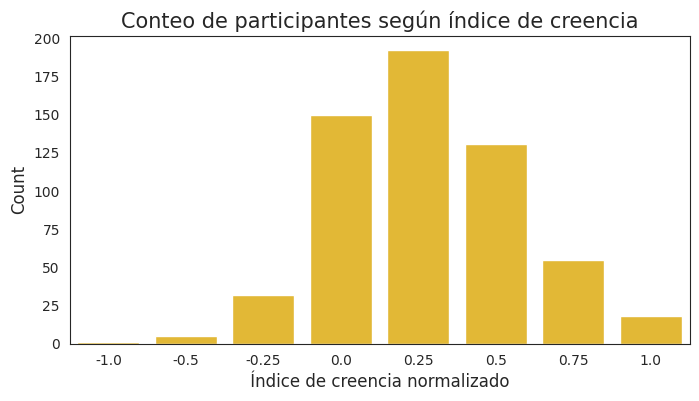

In [150]:
fig = plt.figure(figsize=(8, 4), facecolor='white')
sns.set_style("white")

sns.countplot(x=dfo.indice_creencia_norm, color='#ffc619', linewidth=1)
# Etiquetas de los ejes
plt.title("Conteo de participantes según índice de creencia", fontsize=15)
plt.ylabel("Count", fontsize=12)
plt.xlabel(" Índice de creencia normalizado ",fontsize=12)
plt.show()


<font color='#99b0fa'>En el análisis de la distribución, vale aclarar primero que el índice de creencia normalizado indicaba la diferencia entre la cantidad de respuestas creíbles e increíbles aceptadas, independientemente de su validez. Considerando esto, y teniendo presente que los valores negativos implican la aceptación de más premisas increíbles y los positivos de premisas creíbles, se puede observar en el gráfico una tendencia a valores positivos, es decir, de aceptar más premisas creíbles, sean o no válidas.

<font color='#99b0fa'>Si este gráfico estuviera repartido en partes iguales, se puede decir que no hay sesgo, o si la diferencia entre valores negativos y positivos fuera más pareja, podríamos decir que no hay una tendencia en aceptar premisas creíbles frente a las increíbles. Si bien, sabemos que la diferencia más razonable debería ser 0, que no marcaría ninguna tendencia ni sesgo, observando la tabla vemos muchos más valores por derecha, que no tiene valores proporcionales por izquierda.

<font color='#99b0fa'>Finalmente, de lo descrito anteriormente, observamos que se pueden considerar como diferencias razonables los valores encontrados entre 0 y 0.5, ya que de por sí habría dos preguntas válidas creíbles, que no deberían generar mayores dudas en aceptarse, así como dos preguntas inválidas increíbles que se rechazarían. En este sentido, se podría dudar que la tendencia observada sea solamente por la credibilidad, y no también por la validez de las preguntas. Situación que se resuelve a continuación en otra pregunta.

¿Se puede afirmar que esta diferencia se deba solamente a la credibilidad?

<font color='#99b0fa'>Para analizar lo antes planteado, se plantea un nuevo índice, llamado índice de credibilidad acotado. Lo que se hace es crear un nuevo índice, que no contabilice las preguntas límite, es decir, las que podrían ser más fácilmente aceptadas (válidas creíbles) o rechazadas (inválidas increíbles).


<font color='#99b0fa'>$$índice\:de\:creencia\:acotado=suma\:aceptación\:(IC)-suma\:aceptación\:(VI) $$
$$= (suma\:aceptación\:(S3 + S7)) - (suma\:aceptación\:(S2 + S6))$$


<font color='#99b0fa'>De esta forma, la diferencia en este índice se reduciría directamente en dos, pudiendo obtener como resultado valores entre -2 y 2. Como quedan solamente de un lado las variables inválidas creíbles y del otro lado las válidas increíbles, se puede observar la diferencia que hay entre ellas, diferencia tal que se traslada al otro índice.


In [151]:
dfo["indice_creencia_acot"]=((dfo['Acep_S3']+dfo['Acep_S7'])-(dfo['Acep_S2']+dfo['Acep_S6'])).astype('int')
dfo.loc[:, ['Acep_S1','Acep_S5','Acep_S3','Acep_S7','Acep_S2','Acep_S6','Acep_S4','Acep_S8', 'indice_creencia','indice_creencia_acot']]

,Acep_S1,Acep_S5,Acep_S3,Acep_S7,Acep_S2,Acep_S6,Acep_S4,Acep_S8,indice_creencia,indice_creencia_acot
0,1,1,0,1,1,1,0,0,1,-1
1,1,1,0,1,1,1,0,1,0,-1
2,1,0,0,1,0,0,0,0,2,1
3,1,1,0,1,1,1,0,0,1,-1
4,1,1,0,1,0,1,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...
340,1,1,1,1,1,1,0,0,2,0
341,1,1,1,0,1,1,0,0,1,-1
342,1,1,1,1,1,1,0,0,2,0
343,1,1,1,1,1,1,0,0,2,0


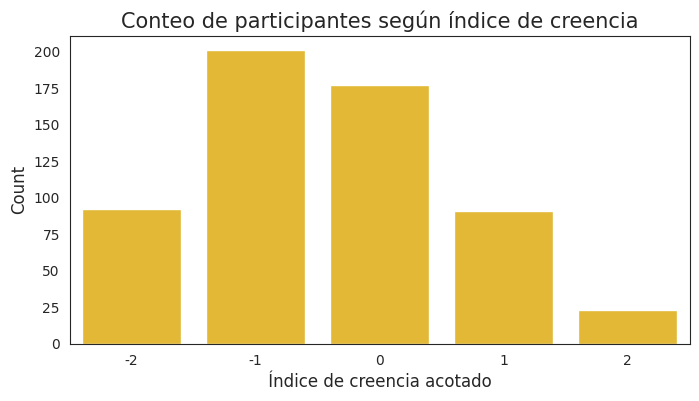

In [152]:
fig = plt.figure(figsize=(8, 4), facecolor='white')
sns.set_style("white")

sns.countplot(x=dfo.indice_creencia_acot, color='#ffc619', linewidth=1)

# Etiquetas de los ejes
plt.title("Conteo de participantes según índice de creencia", fontsize=15)
plt.ylabel("Count", fontsize=12)
plt.xlabel(" Índice de creencia acotado ",fontsize=12)
plt.show()
plt.show()

<font color='#99b0fa'>Si se observa el gráfico anterior, se ve como la tendencia se inclina a ser más central, con una leve inclinación hacia la izquierda, es decir, a aceptar premisas validas increibles. Esto podría indicar que la credibilidad tiene menos influencia que la pensada, pero son justamente la cantidad de valores que se encuentran entre 0 y 2, que no deberían estar, los que hacen inclinar la tendencia, y la mantienen más centrada. Observando detenidamente, se ve que la suma de los valores negativos es mayor que la de los positivos, pero si a estos últimos se les agrega el valor 0, que podrían considerarse también como valores dudosos, es decir, que no deberían estar si no se considerará la influencia de la credibilidad, superan ampliamente a los negativos.
Luego de este breve análisis, si bien se puede debatir al respecto del nivel de influencia de la credibilidad de una premisa sobre su aceptación, es innegable la existencia de la misma.

¿Tiene incidencia la modalidad de resolución en la aparición de sesgos?

Las nuevas tablas tienen que comenzar con las columnas Participante y Modalidad y luego continúan con la validez del primer silogismo, su aceptación y corrección, además que se considera interesante no perder la columna creencia. Por lo tanto se terminará teniendo cuatro columnas por cada silogismo más las dos primeras, es decir 34 columnas.


Text(0.5, 1.0, 'Matriz de confusión')

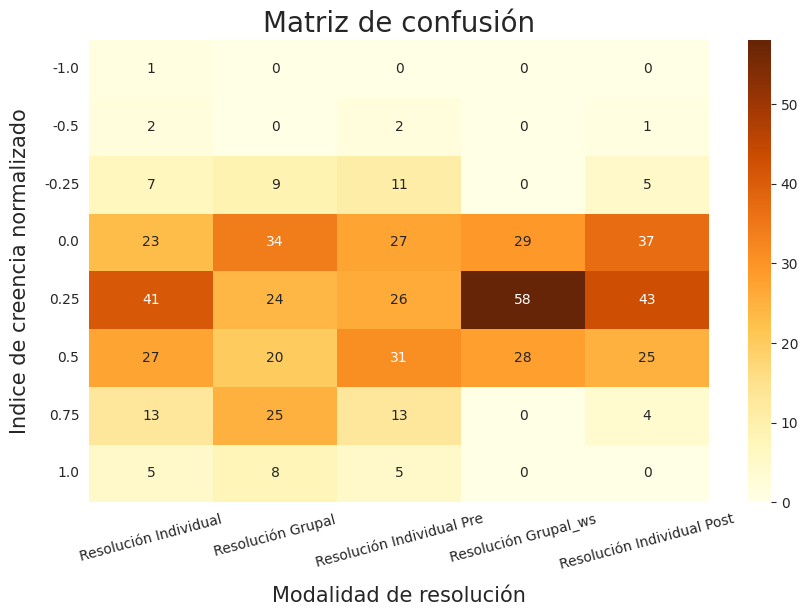

In [153]:
sorted_modalidad = ['Resolución Individual', 'Resolución Grupal','Resolución Individual Pre','Resolución Grupal_ws', 'Resolución Individual Post']
fig = plt.figure(figsize=(10,6))
#plt.style.use('seaborn')

#plt.style.use('classic')
#new_cmap = LinearSegmentedColormap.from_list("Lilas", ['black', color])
new_cmap='YlOrBr'
exp = pd.crosstab(dfo.indice_creencia_norm, dfo.Modalidad)[sorted_modalidad]
sns.heatmap(exp, annot=True, fmt='g', cmap=new_cmap)
plt.xticks(rotation=15)
plt.yticks(rotation=0)
plt.xlabel('Modalidad de resolución', labelpad=10, size=15)
plt.ylabel('Indice de creencia normalizado', labelpad=10, size=15)
plt.title('Matriz de confusión', size=20)

/tmp/ipython-input-1401618063.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap(new_cmap)


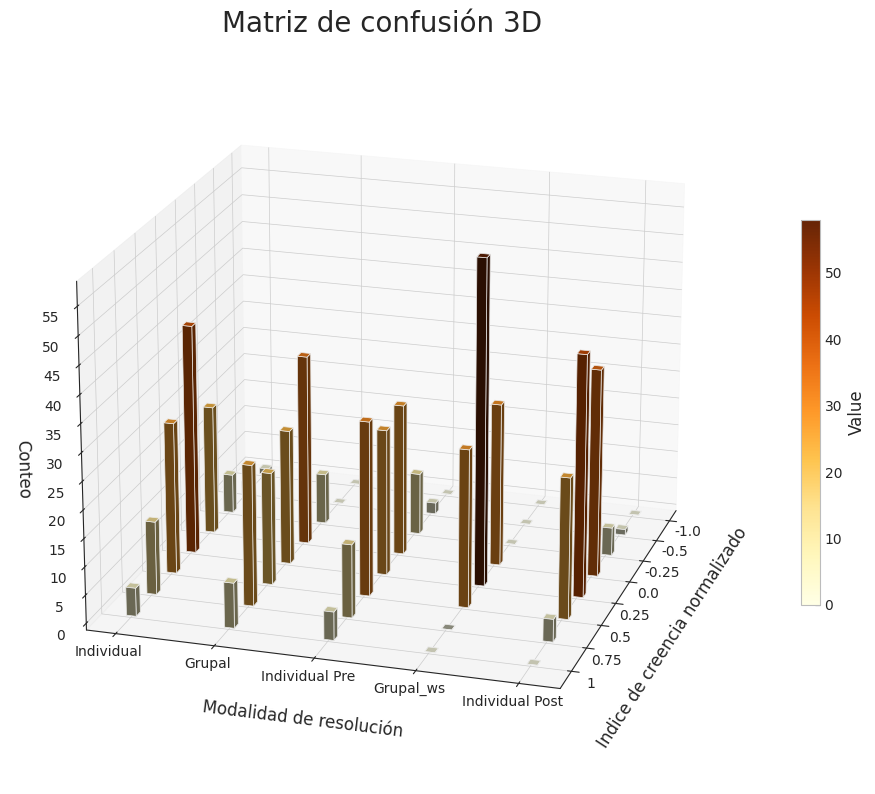

In [154]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
plt.style.use('bmh')

matrix_data = exp.values
rows, cols = matrix_data.shape

y_pos, x_pos = np.meshgrid(np.arange(cols), np.arange(rows))
x_pos = x_pos.flatten()
y_pos = y_pos.flatten()
z_pos = np.zeros(rows * cols)

values = matrix_data.flatten()

cmap = plt.cm.get_cmap(new_cmap)
norm = plt.Normalize(vmin=np.min(values), vmax=np.max(values))
colors = cmap(norm(values))

ax.bar3d(x_pos, y_pos, z_pos, dx=0.2, dy=0.1, dz=values, color=colors)

ax.set_zlabel('Conteo')
ax.set_ylabel('Modalidad de resolución', labelpad=10)
ax.set_xlabel('Indice de creencia normalizado', labelpad=10)
ax.set_title('Matriz de confusión 3D', size=20)

ax.set_yticks(np.arange(cols))
ax.set_xticks(np.arange(rows))
ax.set_zticks(np.arange(0, np.max(values) + 1, 5))
ax.set_yticklabels(['Individual', 'Grupal','Individual Pre','Grupal_ws', 'Individual Post'], verticalalignment='baseline')
ax.set_xticklabels([-1.  , -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75, 1], verticalalignment='baseline')

cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=new_cmap, norm=norm), shrink=0.5, ax=ax)
cbar.set_label('Value')

ax.view_init(elev=20, azim=-343)

plt.show()

<font color='#99b0fa'>A partir de la matriz de confusión se puede asegurar que la modalidad de resolución ejerce influencia en la aparición de sesgos. Lo primero que se puede destacar es que el menor conteo de índices de valor 0 corresponde a la modalidad individual e individual pre, siendo los mayores conteos correspondientes a la modalidad grupal e individual post. Incluso, se observa un marcado aumento de los mismos en el modo individual posterior a la resolución grupal, lo que destacaría la influencia que el método grupal tuvo en cada individuo.

<font color='#99b0fa'>Por otro lado si se analizan las distribuciones para cada modalidad, la individual post y grupal ws son las que tienen los conteos más agrupados alrededor del valor 0.25 (casi sin sesgo) y prácticamente no tienen índices negativos ni valores de 1 o 0.75, sobresalientemente la modalidad grupal ws. Esto se podría deber a que en la modalidad grupal ws se logra llegar a un consenso global entre todos los participantes, mientras que por separado cada uno muestra cierto sesgo a aceptar las premisas creíbles.

<font color='#99b0fa'>Lo anterior no se repite en la modalidad grupal, la cual, aunque tiene un buen conteo de índices 0 también tiene valores muy altos de índices positivos hasta 0.75.

<font color='#99b0fa'>Por último, cabe mencionar la tendencia curiosa en las modalidades individual e individual pre, que tienen la mayor cantidad de índices negativos. Si observamos incluso que estos valores desaparecen en la modalidad grupal, para luego reaparecer en la modalidad individual posterior, podemos decir que los participantes tienen más tendencia a aceptar las premisas increíbles cuando están individualmente.


 ¿Son similares los resultados hallados utilizando la columna `indice_creencia_norm` con los obtenidos en la primera actividad práctica?

<font color='#99b0fa'>En la primera actividad se comprobaron dos hipótesis de manera estadística. La influencia o correlación entre:
*   Validez y creencia del argumento, y su aceptación.
*   Modalidad de resolución y respuesta correcta.


<font color='#99b0fa'>Ambas fueron aceptadas en el primer práctico, luego de analizarlas gráficamente y plantear diferentes test de hipótesis. En este trabajo, se plantea un índice de creencia, con el que se evalúa la influencia de la credibilidad de las premisas y su aceptación.


<font color='#99b0fa'>En comparación al primer trabajo, referido a la primera hipótesis que aceptaba la influencia de la creencia sobre la aceptación, las conclusiones que se obtuvieron son las mismas. En ambos se destaca que la creencia tiene una evidente influencia en aceptar premisas incluso aunque sean inválidas.


<font color='#99b0fa'>Respecto de la segunda hipótesis, en el trabajo anterior se planteó la influencia de la modalidad de resolución respecto de elegir la respuesta correcta, mientras que en este fue en comparación con la credibilidad. En este sentido, aunque tienen diferencias, se puede llegar a una conclusión similar, ya que en líneas generales se deduce que la modalidad de resolución tiene una gran influencia en las respuestas de los participantes, siendo más "acertadas" en las modalidades grupales e individual post.


¿Resulta de utilidad para el análisis de los datos esta última columna añadida?

<font color='#99b0fa'> Incorporar este índice permite elaborar otros análisis y comparaciones, que permiten evaluar en mayor profundidad los datos que se tienen, por lo que es evidente su utilidad. En este sentido, cabe destacar que si bien permite llegar a más conclusiones, sería interesante y beneficioso para el análisis incluir más índices similares, como podría ser uno que estudie las características de la validez o las preguntas correctas, para obtener conclusiones más exactas o precisas.

## 4. Curación II


Hemos realizado una transformación en la estructura original de nuestros datos, lo cual nos ha permitido analizar otros aspectos de los mismos. Sin embargo, aún existen varias columnas con valores de tipo categórico. Como han aprendido en las clases teóricas, podemos realizar análisis de datos categóricos, pero no podremos aplicar algoritmos de aprendizaje automático para predecir la variable objetivo que hemos creado (índice de creencia).

En esta etapa, llevaremos a cabo un último tratamiento de los datos con el objetivo de prepararlos para la aplicación de algoritmos de aprendizaje automático.

### 4.1. Eliminar las columnas no relevantes al problema

(Opcional) sólo aplicable si aún quedan columnas irrelevantes

In [155]:
dfo.columns

Index(['Participante', 'Modalidad', 'Val_S1', 'Val_S2', 'Val_S3', 'Val_S4',
       'Val_S5', 'Val_S6', 'Val_S7', 'Val_S8', 'Cre_S1', 'Cre_S2', 'Cre_S3',
       'Cre_S4', 'Cre_S5', 'Cre_S6', 'Cre_S7', 'Cre_S8', 'VxC_S1', 'VxC_S2',
       'VxC_S3', 'VxC_S4', 'VxC_S5', 'VxC_S6', 'VxC_S7', 'VxC_S8', 'Acep_S1',
       'Acep_S2', 'Acep_S3', 'Acep_S4', 'Acep_S5', 'Acep_S6', 'Acep_S7',
       'Acep_S8', 'Corr_S1', 'Corr_S2', 'Corr_S3', 'Corr_S4', 'Corr_S5',
       'Corr_S6', 'Corr_S7', 'Corr_S8', 'indice_creencia',
       'indice_creencia_norm', 'indice_creencia_acot'],
      dtype='object')

<font color='#99b0fa'> La columna indice_creencia y la columna indice_creencia_norm contienen la misma información, por lo que no es necesaria tener ambas, así que se decide eliminar la primera que no tiene los valores normalizados. De forma similar las columnas VxC de cada silogismo resulta redundante frente a las columnas V y C, por lo que se decide descartar estas ultimas y asi generar menos exigencia computacional con los modelos predictivos que se van a realizar. Respecto del índice de creencia acotado, fue usado exclusivamente para realizar el análisis anterior, por lo que también se elimina.

In [156]:
df=dfo.copy()
df=df.drop(["indice_creencia", 'Val_S1', 'Val_S2', 'Val_S3', 'Val_S4',
       'Val_S5', 'Val_S6', 'Val_S7', 'Val_S8', 'Cre_S1', 'Cre_S2', 'Cre_S3',
       'Cre_S4', 'Cre_S5', 'Cre_S6', 'Cre_S7', 'Cre_S8',"indice_creencia_acot"], axis=1)

In [157]:
df.columns

Index(['Participante', 'Modalidad', 'VxC_S1', 'VxC_S2', 'VxC_S3', 'VxC_S4',
       'VxC_S5', 'VxC_S6', 'VxC_S7', 'VxC_S8', 'Acep_S1', 'Acep_S2', 'Acep_S3',
       'Acep_S4', 'Acep_S5', 'Acep_S6', 'Acep_S7', 'Acep_S8', 'Corr_S1',
       'Corr_S2', 'Corr_S3', 'Corr_S4', 'Corr_S5', 'Corr_S6', 'Corr_S7',
       'Corr_S8', 'indice_creencia_norm'],
      dtype='object')

### 4.2. Codificación de variables categóricas

Codifiquen las variables categóricas y eliminen las columnas originales

En este caso, las variables categóricas son la VxC (ValidezxCredibilidad). La evaluación consistía en que cada participante respondiera la validez o no de 8 silogismos. En las tablas, tenemos una respuesta de cada participante completa, es decir, de los 8 silogismos, por cada fila, y la información de cada silogismo por columna.

Para no ampliar más la cantidad de filas ni de columnas, se decidió codificar cada variable de VxC con numeros del 1 al 4, siendo VC=1, IC=2, VI=3 e II=4. Por el mismo motivo, no usamos otro método de codificación, porque esto implicaria aumentar las filas o las columnas, siendo lo mínimo por lo que se debiera multiplicar 8 (una fila por cada respuesta de cada participante a cada silogismo). Sin considerar, además, que esto implicaría separar los datos de respuesta de cada participante, que es lo que nos interesa comparar en definitiva.

In [158]:
vc=['VxC_S1', 'VxC_S2', 'VxC_S3', 'VxC_S4', 'VxC_S5', 'VxC_S6', 'VxC_S7', 'VxC_S8']
df[vc] = np.where(df[vc] == 'VC', 1, np.where(df[vc] == 'IC', 2, np.where(df[vc] == 'VI', 3, 4)))
# como no se puede utilizar valores como 01 y 00 se decidio codificar las cuatro posibilidades como VC=1, IC=2, VI=3 y II=4
df

,Participante,Modalidad,VxC_S1,VxC_S2,VxC_S3,VxC_S4,VxC_S5,VxC_S6,VxC_S7,VxC_S8,...,Acep_S8,Corr_S1,Corr_S2,Corr_S3,Corr_S4,Corr_S5,Corr_S6,Corr_S7,Corr_S8,indice_creencia_norm
0,1,Resolución Individual,1,3,2,4,1,3,2,4,...,0,1,1,1,1,1,1,0,1,0.25
1,2,Resolución Individual,1,3,2,4,1,3,2,4,...,1,1,1,1,1,1,1,0,0,0.00
2,3,Resolución Individual,1,3,2,4,1,3,2,4,...,0,1,0,1,1,0,0,0,1,0.50
3,4,Resolución Individual,1,3,2,4,1,3,2,4,...,0,1,1,1,1,1,1,0,1,0.25
4,5,Resolución Individual,1,3,2,4,1,3,2,4,...,0,1,0,1,1,1,1,0,1,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,353,Resolución Individual Post,1,3,2,4,1,3,2,4,...,0,1,1,0,1,1,1,0,1,0.50
341,353,Resolución Individual Pre,1,3,2,4,1,3,2,4,...,0,1,1,0,1,1,1,1,1,0.25
342,354,Resolución Grupal_ws,1,3,2,4,1,3,2,4,...,0,1,1,0,1,1,1,0,1,0.50
343,354,Resolución Individual Post,1,3,2,4,1,3,2,4,...,0,1,1,0,1,1,1,0,1,0.50


In [159]:
df.dtypes #Verificando los tipos de datos

,0
Participante,int64
Modalidad,object
VxC_S1,int64
VxC_S2,int64
VxC_S3,int64
VxC_S4,int64
VxC_S5,int64
VxC_S6,int64
VxC_S7,int64
VxC_S8,int64


In [160]:
corr=['Acep_S1', 'Acep_S2','Acep_S3', 'Acep_S4', 'Acep_S5', 'Acep_S6', 'Acep_S7', 'Acep_S8']
acep=['Corr_S1', 'Corr_S2', 'Corr_S3', 'Corr_S4', 'Corr_S5', 'Corr_S6','Corr_S7', 'Corr_S8']
df[corr] = df[corr].astype(int)
df[acep] = df[acep].astype(int)

In [161]:
df.dtypes

,0
Participante,int64
Modalidad,object
VxC_S1,int64
VxC_S2,int64
VxC_S3,int64
VxC_S4,int64
VxC_S5,int64
VxC_S6,int64
VxC_S7,int64
VxC_S8,int64


### 4.3. Datos curados

Guardar el dataframe con los datos transformados en un nuevo archivo .csv : `datos_preprocesados_grupo_1.csv` ó `datos_preprocesados_grupo_2.csv`, según corresponda

In [163]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [164]:
df.to_csv('/content/drive/Shareddrives/M15-sesgos lógicos-Grupo 2/datos_preprocesados_grupo_2.csv', index=False)

## 5. Conclusiones


Elaboren un breve informe de lo realizado durante esta actividad práctica reseñando aspectos salientes, dificultades encontradas, etc.

---------------------------------------------------------------------------------------------------------------------------------------------------------


# ¡Felicitaciones! Han completado la primera parte de nuestra mentoría y ya tenemos nuestros datos listos para aplicar algoritmos de aprendizaje automático ☺

# <font color='#99b0fa'> <center> **RESULTADOS**
---
<font color='#99b0fa'>En este segundo trabajo se desarrolló la curación y exploración de los datos, para  conseguir conclusiones más profundas y provechosas, así como una base de datos útil para continuar trabajando.


---

## *Observaciones generales*
<font color='#99b0fa'>Principalmente, cabe destacar la amplia gama de análisis posibles que se pueden realizar con los datos trabajados, pero considerando el objetivo de este trabajo, hay que enfocar los estudios a los sesgos de creencia y su influencia. Es por esto, que la implementación del índice de creencia y el índice de creencia acotado, permitieron expresar de mejor forma la relación que existe entre la credibilidad de un silogismo, la aceptación del mismo por parte de los participantes y la influencia que ejerce la modalidad de resolución.

## Desarrollo

<font color='#99b0fa'>Lo trabajado en este práctico, se puede dividir en tres grandes etapas. En principio, se realizó una limpieza general del data frame, eliminando información que nos resulta irrelevante para nuestro análisis, como el género y la edad. Estas se descartaron por no tener suficiente información para analizar, y por estar desbalanceada la que teníamos al respecto. También, en esta etapa, se reorganizaron los dataset originales, fusionándose en uno solo y ordenando su visualización, para mejorar su lectura y poder trabajar mejor.

<font color='#99b0fa'>En la siguiente etapa, se pasó a introducir una variable nueva, el índice de creencia, que permitiría realizar mayores análisis y visualizaciones más precisas de esta influencia, y permitiría sacar mayores conclusiones al respecto. Luego de introducirlo al dataset y analizar su función, se analizó detenidamente este índice y su relación con otras variables. Finalmente se volvió a realizar un último curado de los datos almacenados, dejando el dataset listo para empezar a trabajar con el aprendizaje automático.

<font color='#99b0fa'>En estas etapas, hubo varios puntos importantes a destacar. En primer lugar, en la adecuación del dataset, se agregaron las respuestas de la modalidad grupal_ws faltantes y se realizó la separación por silogismo. En este punto, la dificultad más grande que se enfrentó fue el  decidir la forma de trabajo para obtener el formato final del dataframe. Para esto, se realizaron varias pruebas de distintas funciones y procedimientos hasta que se consiguieron los resultados requeridos. Cabe destacar que lo más complejo fue conseguir un procedimiento eficiente en el que no se perdiera ningún dato. Además, después de aplicar el "pivot", la tabla obtenida tenía una gran cantidad de columnas, por lo que resultaba un poco incómoda de visualizar.


<font color='#99b0fa'> Luego de esto, la parte central del trabajo fue agregar la columna del índice de creencia y "normalizarlo" para facilitar posterior análisis. Dentro de este análisis, se plantearon diferentes preguntas al respecto, para lo que se introdujo otro índice de creencia, acotado, que permitía dejar en evidencia la influencia de la credibilidad sobre la aceptación de las premisas. También, en esta etapa, se realizó un análisis sobre esta credibilidad con la modalidad de resolución de las tareas, viendo cómo variaba la aceptación cambiando ambas, lo que se puede resumir en el siguiente gráfico, midiendo la influencia de esta credibilidad (sesgo) según sea mayor el valor del índice.

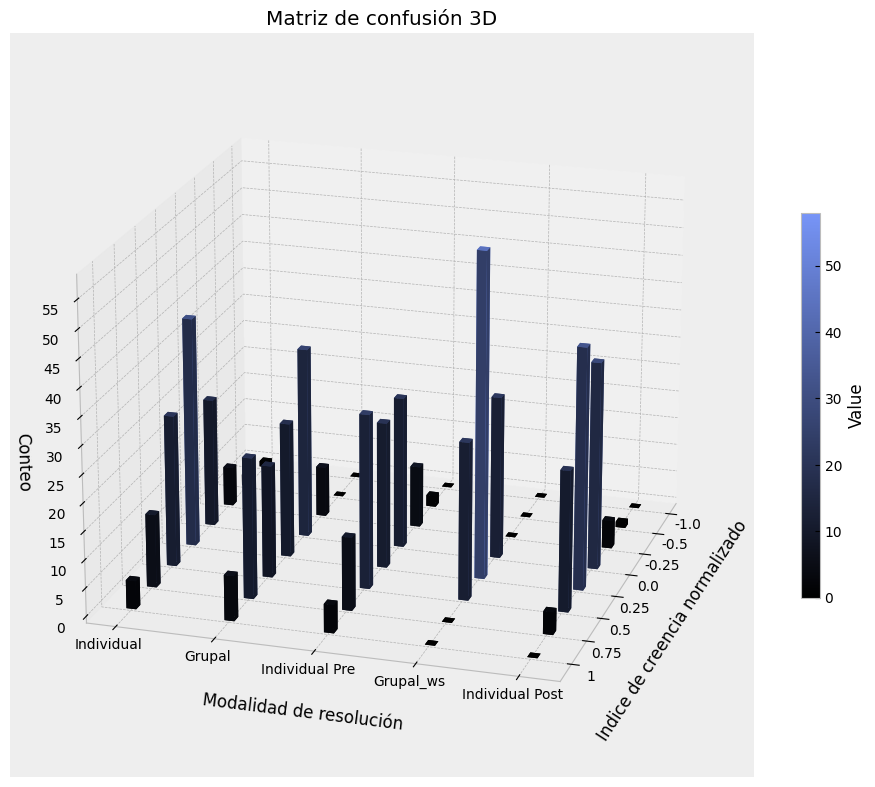

*De la imagen se puede destacar como cambian las distribuciones del índice de creencia según la modalidad de resolución. Teniendo en cuenta esto se destaca como en la modalidad grupal_ws e individual post los conteos están más concentrados en el valor central 0 (sin sesgo) mientras que las otras modalidades, particularmente la modalidad individual y la individual pre tienen los valores más repartidos, hasta presentan los mayores conteos de valores negativos, lo que indican mucha más incidencia de respuestas incorrectas en estas modalidades.*

<font color='#99b0fa'>Finalmente, en la última parte del trabajo, se realizó nuevamente una limpieza del dataset y se transformaron algunas variables, convirtiéndolas en valores numéricos, que permiten implementar aprendizaje automático. También se exportó el dataset final, dejándolo listo para continuar el proyecto.


## RESULTADOS

><font color='#99b0fa'>Luego terminar lo descrito anteriormente, se puede concluir que la credibilidad de un argumento realmente tiene influencia en su aceptación o no. En menor medida, se observó también claramente un cambio en la aceptación de las premisas, según se resolviera de manera individual o grupal, e incluso a posteriori, por lo que se puede decir que hay una notable influencia del grupo sobre los individuos y su credibilidad de las premisas. Se obtuvo también un dataset más limpio, ordenado, y con las variables correctas para su uso en aprendizaje automático.

<font color='#99b0fa'>Como nota al margen, se destaca nuevamente que se podrían incluir otros índices y plantear más análisis diferentes para estas variables, que quedarán como posibilidades para futuros trabajos.
